# Communications numériques

En communications numériques, il n'est pas rare que le récepteur du sytème de communication reçoive un signal de l'émetteur qui soit très brouillé
(on dit qu'il est _bruité_).
Par exemple, si le récepteur reçoit le signal $x$ représenté ci-dessous,
et que ce signal est en réalité une suite d'échelons d'amplitude &minus;1 (représentant le bit 0) ou +1 (représentant le bit 1),
alors l'intercorrélation de $x$ avec un échelon $y$ permet de détecter à chaque instant si le signal reçu ressemble à $y$
(dans ce cas, on a reçu un 1) ou pas (on a reçu un 0).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

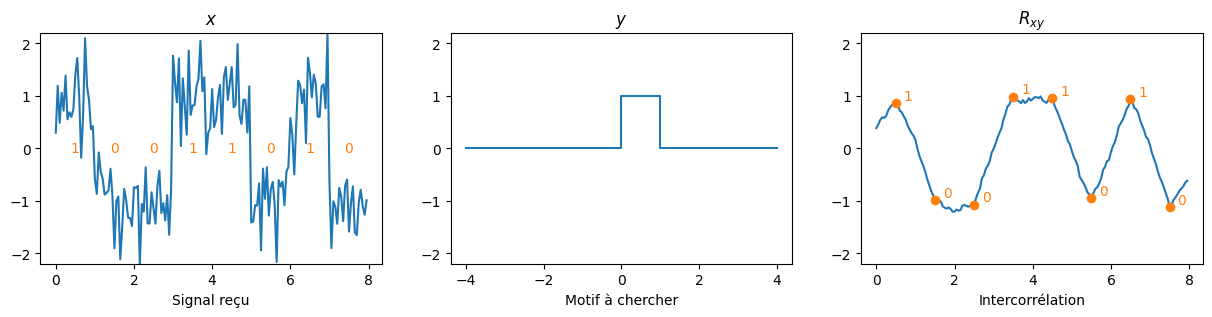

In [2]:
# Initialisation de l'affichage
ylim = [-2.2, 2.2]
fig, axs = plt.subplots(1, 3, figsize=(15,3))

# Message
msg = np.array([1, 0, 0, 1, 1, 0, 1, 0])
M = len(msg)

# Temps & instants d'échantillonnage
Fe = 20
n = np.arange(0, M, 1/Fe)
idx = np.arange(M)*Fe + Fe//2

# Forme d'onde
h = np.ones(Fe)

# Signal émis
x = np.kron(2*msg-1, h)

# Signal reçu (bruité)
b = np.random.normal(0, .5, x.shape)
y = x + b
axs[0].plot(n,y)
for i in range(M):
    axs[0].text(n[idx[i]], 0, msg[i], ha="center", va="center", color="C1")
axs[0].set_title('$x$')
axs[0].set_xlabel('Signal reçu')
axs[0].set_ylim(ylim)

# Forme d'onde (graphique)
axs[1].plot([-4, 0, 0, 1, 1, 4], [0, 0, 1, 1, 0, 0])
axs[1].set_title('$y$')
axs[1].set_xlabel('Motif à chercher')
axs[1].set_ylim(ylim)

# Intercorrélation
z = np.correlate(y, h/Fe, mode="same")
axs[2].plot(n, z)
for i in range(M):
    axs[2].plot(n[idx[i]], z[idx[i]], "C1o")
    axs[2].text(n[idx[i]]+.2, z[idx[i]], msg[i], ha="left", va="bottom", color="C1")
axs[2].set_title("$R_{xy}$")
axs[2].set_xlabel('Intercorrélation')
axs[2].set_ylim(ylim)

plt.savefig("communications.svg", bbox_inches="tight")

Intercorrélation de $x$ avec $y$. Le signal $x$ véhicule le message 10011010 codé en 

<a href="https://fr.wikipedia.org/wiki/Non_Return_to_Zero" target="_blank">NRZ</a> avec le motif $y$.